<a href="https://colab.research.google.com/github/Servant7/b2-4/blob/main/Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Analisis Data Pelanggan Toko dengan menggunakan Metode Clustering </h1>

**Brief** :

Kali ini akan dilakukan sebuah analisis terhadap Data Pelanggan Toko dengan menggunakan metode clustering. Tujuan dari analisis ini adalah untuk membantu pemilik toko dalam memahami pelangganya dari dataset yang Ada.

**Dataset**

Dataset diperoleh dari kaggle : https://www.kaggle.com/datasets/datascientistanna/customers-dataset

# **Persiapan**

In [ ]:
# Untuk Tabulasi dan analisis
import pandas as pd
# Untuk perhitungan
import numpy as np
import math as m

# Untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
link = "https://drive.google.com/file/d/1u0VahQHoXU12-EUz36kgp9GnR7LFsKQz/view?usp=sharing"
link_url = "https://drive.google.com/uc?id=1u0VahQHoXU12-EUz36kgp9GnR7LFsKQz"
url = "https://drive.google.com/uc?id=1u0VahQHoXU12-EUz36kgp9GnR7LFsKQz"

# **Business Understanding**<br>
berisi materi penjelasan tentang datasetnya, visi misi (kalo ada), target dan tujuan dari penelitian, alasan menggunakan data minning dsb...

# **Data Understanding**
Terdiri atas collect initial data, describe data, dan explore data

**1. Collect Initial Data**

Pertama-tama kita perlu mengambil dataset dan menyimpanya dalam dataframe

In [ ]:
df = pd.read_csv(url, encoding="ISO-8859-1")
df = pd.read_csv(link_url,index_col="CustomerID")

Lalu kita melihat ada berapa jumlah baris dan kolom pada dataset ini

In [ ]:
# Shape
df.shape
# Terdapat 2000 baris dan 7 kolom pada data ini

(2000, 7)

**2. Describe Data**<br>



In [ ]:
#menampilkan 5 data teratas
df.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
1,Male,19,15000,39,Healthcare,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Entertainment,2,6


In [ ]:
#melihat jumlah baris dan kolom
df.shape

(2000, 7)

Melihat tipe data pada dataset serta banyaknya data yang terisi pada dataset

In [ ]:
# Menampilkan Informasi variabel pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  2000 non-null   object
 1   Age                     2000 non-null   int64 
 2   Annual Income ($)       2000 non-null   int64 
 3   Spending Score (1-100)  2000 non-null   int64 
 4   Profession              1965 non-null   object
 5   Work Experience         2000 non-null   int64 
 6   Family Size             2000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 125.0+ KB


Terlihat bahwa dataset tidak memiliki null values dan setiap tipe datanya telah sesuai.

## Penjelasan Kolom

Berdasarkan dari [Kaggle (sumber-data)](https://www.kaggle.com/datasets/datascientistanna/customers-dataset). Setiap kolom pada dataset memiliki deskripsi sebagai berikut.

> Gender          : Jenis Kelamin Customer <br>
> Age             : Umur Customer <br>
> Annual Income   : Pendapatan  <br>
> SpendingScore   : Score yang diberikan berdasarkan perilaku customer <br>
> Profession      : Jenis pekerjaan <br>
> Work Experience : Pengalaman Bekerja berapa tahun <br> dan
> Family Size 

# **Data Preparation**<br>
Terdiri atas select data, clean data, construct data, integrate data, dan format data

**1. Select data**<br>
Adalah bagian menentukan dataset yang akan digunakan apabila terdapat banyak tabel

**2. Clean Data**<br>
Terbagi menjadi 3, yaitu Datatype, Missing value, dan Outlier Handling

**A. Datatype**

In [ ]:
df.columns

Index(['Gender', 'Age', 'Annual Income ($)', 'Spending Score (1-100)',
       'Profession', 'Work Experience', 'Family Size'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  2000 non-null   object
 1   Age                     2000 non-null   int64 
 2   Annual Income ($)       2000 non-null   int64 
 3   Spending Score (1-100)  2000 non-null   int64 
 4   Profession              1965 non-null   object
 5   Work Experience         2000 non-null   int64 
 6   Family Size             2000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 125.0+ KB


In [ ]:
df.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
1,Male,19,15000,39,Healthcare,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Entertainment,2,6


In [ ]:
df.tail()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
1996,Female,71,184387,40,Artist,8,7
1997,Female,91,73158,32,Doctor,7,7
1998,Male,87,90961,14,Healthcare,9,2
1999,Male,77,182109,4,Executive,7,2
2000,Male,90,110610,52,Entertainment,5,2


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2000.0,48.9600,28.429747,0.0,25.0,48.0,73.00,99.0
Annual Income ($),2000.0,110731.8215,45739.536688,0.0,74572.0,110045.0,149092.75,189974.0
Spending Score (1-100),2000.0,50.9625,27.934661,0.0,28.0,50.0,75.00,100.0
Work Experience,2000.0,4.1025,3.922204,0.0,1.0,3.0,7.00,17.0
Family Size,2000.0,3.7685,1.970749,1.0,2.0,4.0,5.00,9.0


**B. Missing value**

In [ ]:
df.isna().sum()

Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

**C. Outlier Handling**

In [ ]:
#melihat umur dari pelanggan tertua
df.sort_values("Age",ascending=False).head(30)

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
1134,Female,99,57677,99,Lawyer,0,5
568,Female,99,172896,13,Engineer,0,3
1525,Female,99,150782,18,Executive,8,2
1669,Female,99,174275,4,Healthcare,0,2
1402,Male,99,139685,20,Healthcare,1,4
1323,Female,99,144176,74,Marketing,7,2
1772,Female,99,84167,46,Artist,10,7
1104,Female,99,103706,50,Entertainment,1,2
1017,Female,99,55972,83,Entertainment,1,7


In [ ]:
#melihat umur dari pelanggan termuda
df.sort_values("Age").head(30)

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
795,Female,0,147719,86,Lawyer,1,7
1980,Male,0,165321,93,Doctor,8,1
864,Female,0,141351,10,Engineer,0,2
1584,Female,0,120899,7,Marketing,2,6
1926,Female,0,105935,46,Doctor,4,5
444,Female,0,68761,16,Lawyer,1,4
822,Female,0,116759,28,Marketing,7,3
212,Female,0,22000,92,Artist,2,1
229,Male,0,33000,64,Marketing,1,1


Terdeteksi outlier dimana terdapat pelanggan yang berumur 0 tahun

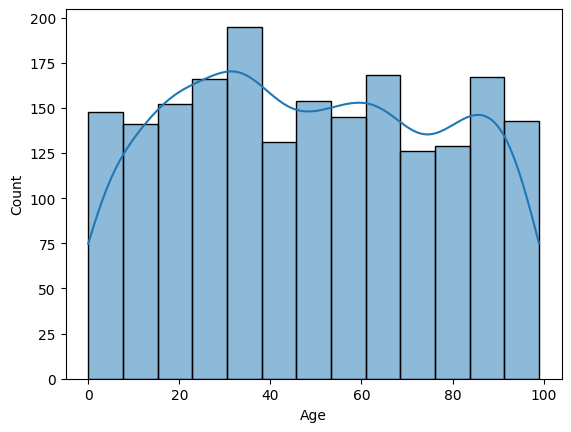

In [ ]:
sns.histplot(data=df.Age, kde=True);

In [ ]:
for i in df.loc[:,["Age"]]:
    df.loc[df.Age<22,i]=22
    df.loc[df.Age>80,i]=80

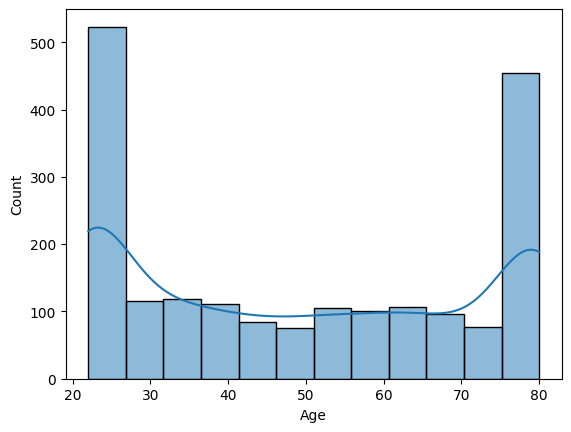

In [ ]:
sns.histplot(data=df.Age, kde=True);

In [ ]:
num_list=[i for i in df.select_dtypes(["int64","float64"])]
cat_list=[i for i in df.select_dtypes("object")]

In [ ]:
num_list

['Age',
 'Annual Income ($)',
 'Spending Score (1-100)',
 'Work Experience',
 'Family Size']

In [ ]:
cat_list

['Gender', 'Profession']

In [ ]:
for i in df.loc[:,num_list]:
    Q1 = df[i].quantile(0.15)
    Q3 = df[i].quantile(0.85)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df[(df[i] > up) | (df[i] < low)].any(axis=None):
        print(i,"Yes")
    else:
        print(i, "No")

Age No
Annual Income ($) No
Spending Score (1-100) No
Work Experience No
Family Size No


**3. Construct Data**

1.   Hapus Kolom yang tidak digunakan
2.   Ekstrak Kolom yang ada



In [ ]:
#melihat 5 kolom teratas
df.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
1,Male,22,15000,39,Healthcare,1,4
2,Male,22,35000,81,Engineer,3,3
3,Female,22,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Entertainment,2,6


**4. Visualisasi**

In [ ]:
#menghitung nilai korelasi antar kolom untuk menunjukkan seberapa kuat hubungan antar kolom tersebut
df.corr()

<ipython-input-30-2fe7ae1eece2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
Age,1.000000,0.034465,-0.032605,-0.012637,0.038324
Annual Income ($),0.034465,1.000000,0.026716,0.087135,0.093757
Spending Score (1-100),-0.032605,0.026716,1.000000,-0.025587,0.005859
Work Experience,-0.012637,0.087135,-0.025587,1.000000,0.012727
Family Size,0.038324,0.093757,0.005859,0.012727,1.000000


<ipython-input-31-5e13acb9d13a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

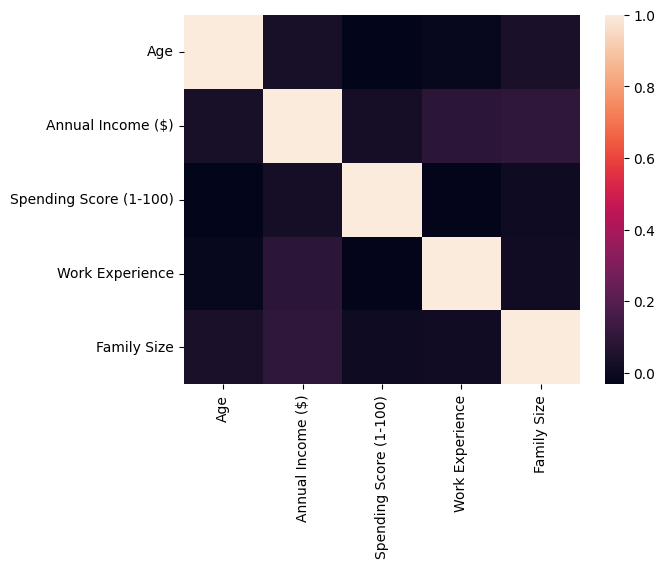

In [ ]:
#digunakan untuk memvisualisasikan korelasi antar fitur dalam dataframe 
sns.heatmap(df.corr())

<ipython-input-32-b688c74bb002>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidths=0.6,fmt=".2f",cmap="coolwarm");


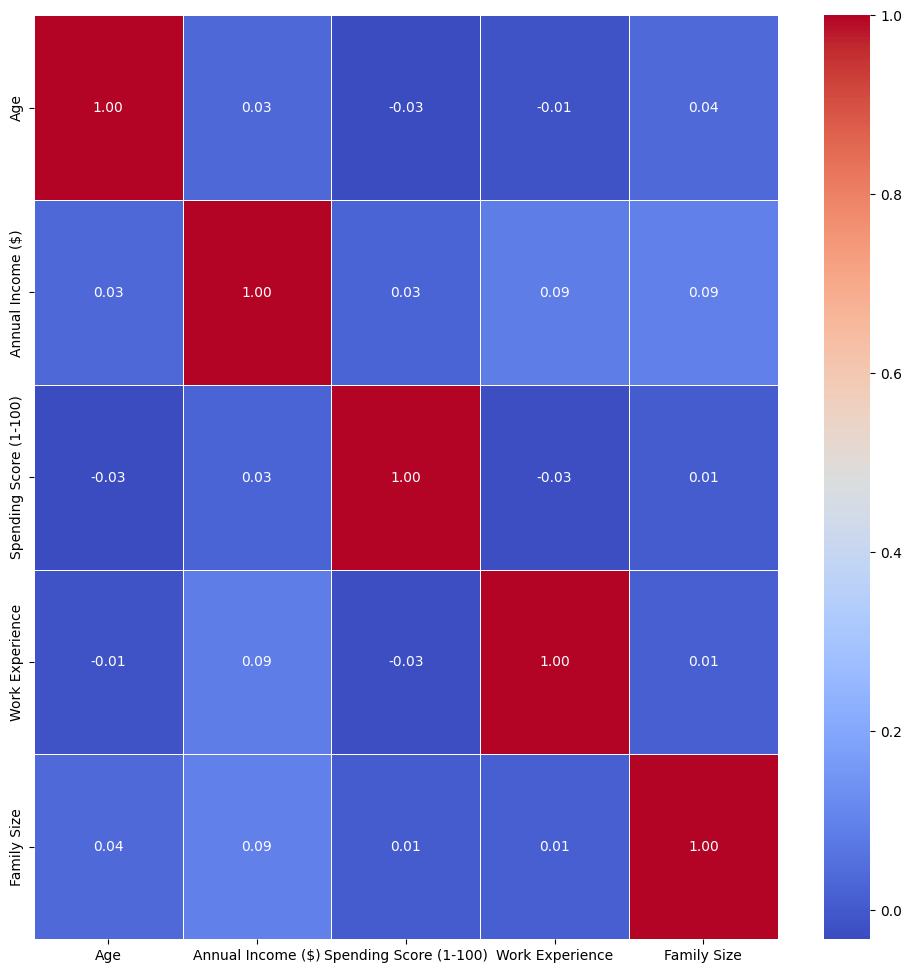

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.6,fmt=".2f",cmap="coolwarm");

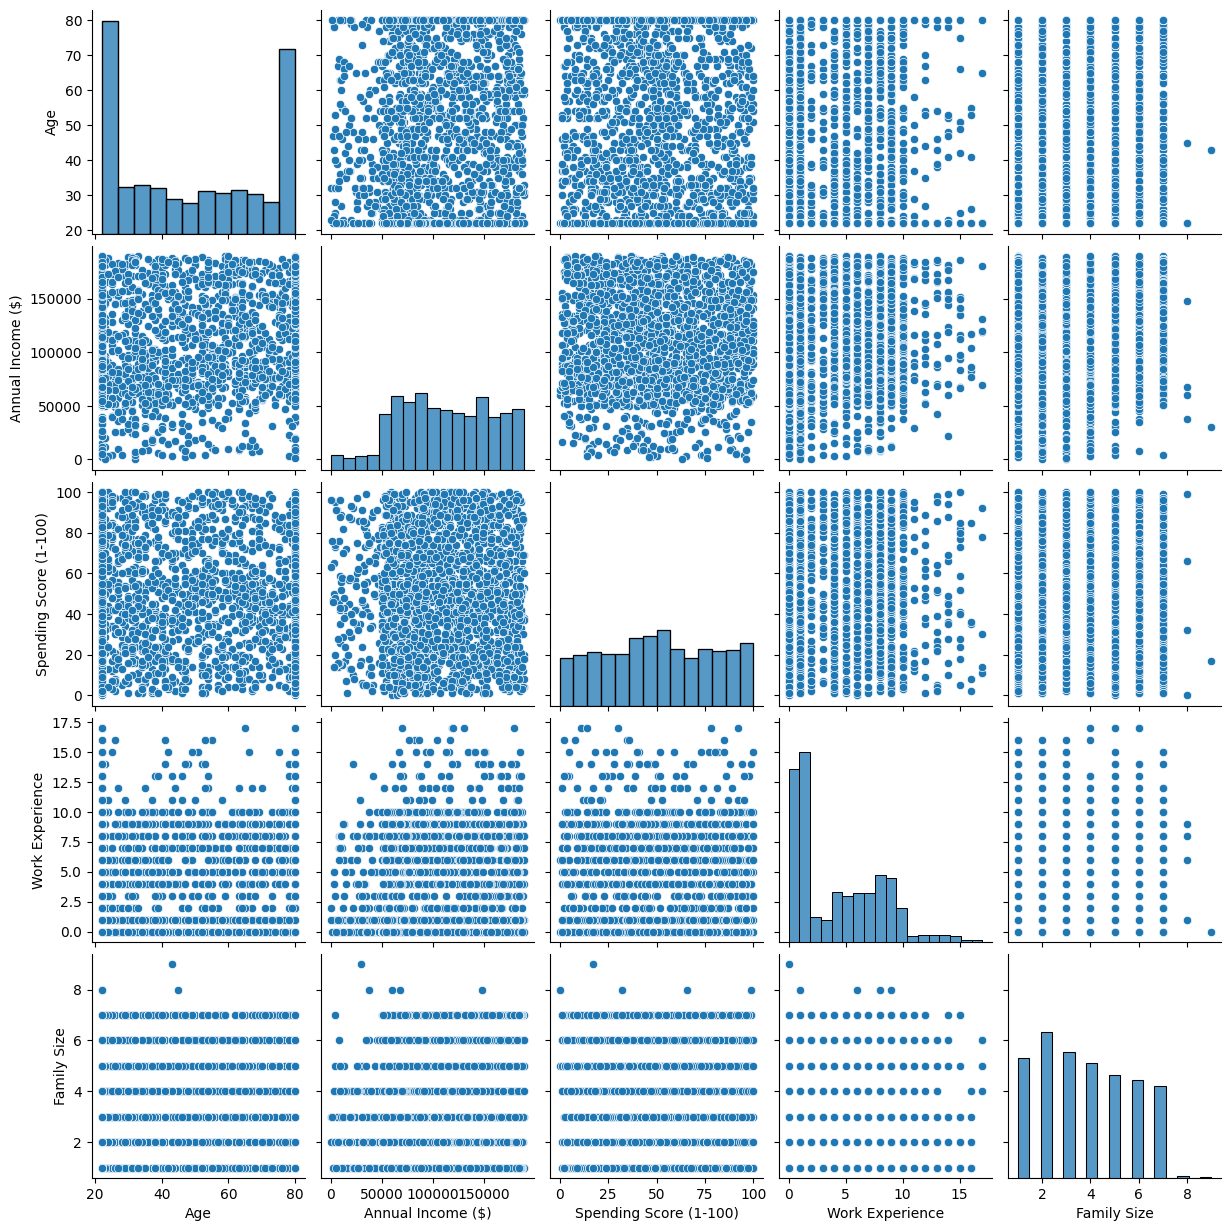

In [ ]:
sns.pairplot(df)

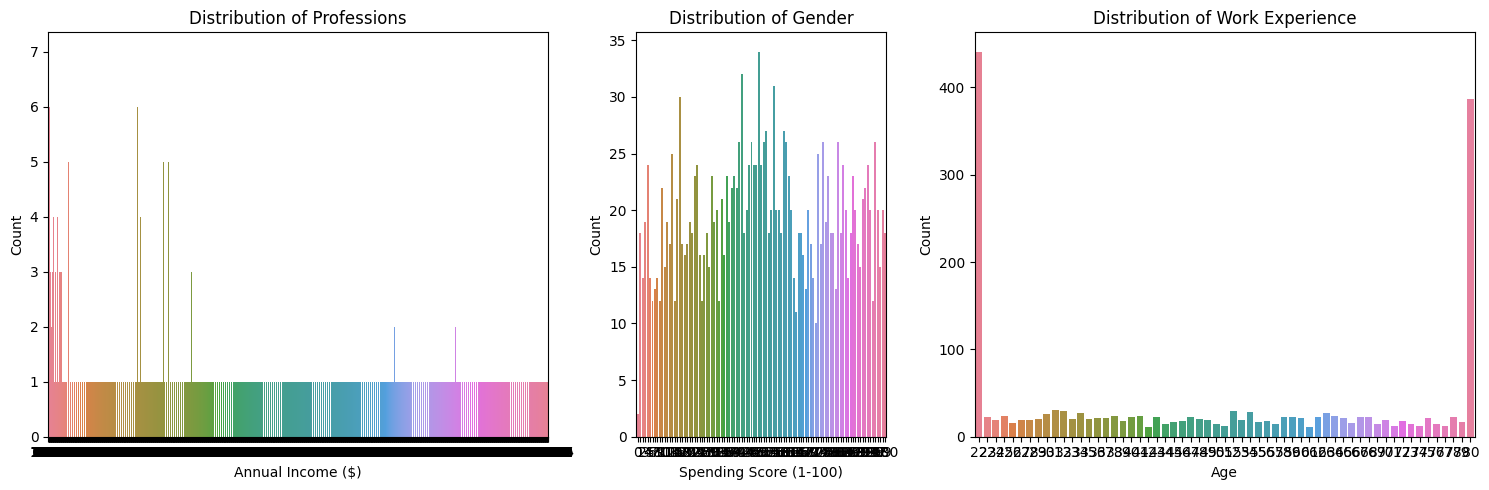

In [ ]:
# Create a figure with three subplots using GridSpec
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), gridspec_kw={'width_ratios': [2, 1, 2]})

# Create a countplot of "Profession" and set axis labels and title
sns.countplot(data=df, x='Annual Income ($)', ax=axes[0], palette='husl')
axes[0].set_xlabel('Annual Income ($)')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Professions')

# Create a countplot of "Gender" and set axis labels and title
sns.countplot(data=df, x='Spending Score (1-100)', ax=axes[1], palette='husl')
axes[1].set_xlabel('Spending Score (1-100)')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Gender')

# Create a countplot of "Work Experience" and set axis labels and title
sns.countplot(data=df, x='Age', ax=axes[2], palette='husl')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Count')
axes[2].set_title('Distribution of Work Experience')

# Adjust the spacing between subplots
fig.tight_layout()

# Set the width of the bins
for ax in axes:
    for patch in ax.patches:
        patch.set_width(0.8)

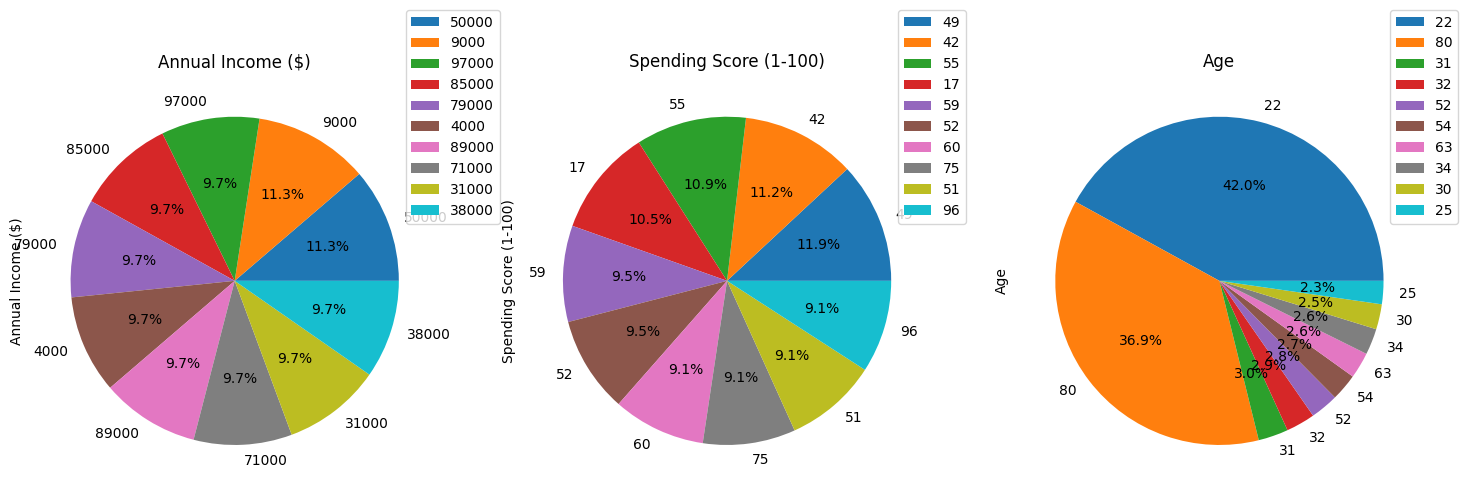

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6)) # Create subplots

for i, col in enumerate(['Annual Income ($)', 'Spending Score (1-100)','Age']):
    df[col].value_counts().head(10).plot.pie(autopct='%1.1f%%', ax=axes[i]) # Specify subplot axis
    axes[i].set_aspect('equal') # Set aspect ratio to make charts circular
    axes[i].set_title(col) # Set subplot title
    axes[i].legend(bbox_to_anchor=(.9, 0.9), loc='center left') # Set legend location

plt.show() # Show the subplots

**5. Format Data / Preprocessing**

A. Encoding<br>
B. Train-test split<br>
C. Cross_validation (optional)

**A. Encoding**

In [ ]:
#fungsi pd.get_dummies() digunakan untuk melakukan one-hot encoding pada dataframe df
# One-hot encoding adalah proses mengubah variabel kategorikal menjadi bentuk numerik agar bisa diproses oleh algoritma machine learning
df = pd.get_dummies(df)

In [ ]:
df.head()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
CustomerID,,,,,,,,,,,,,,,,
1,22,15000,39,1,4,0,1,0,0,0,0,0,1,0,0,0
2,22,35000,81,3,3,0,1,0,0,1,0,0,0,0,0,0
3,22,86000,6,1,1,1,0,0,0,1,0,0,0,0,0,0
4,23,59000,77,0,2,1,0,0,0,0,0,0,0,0,1,0
5,31,38000,40,2,6,1,0,0,0,0,1,0,0,0,0,0


**B. Train-test Split**

In [ ]:
#membagi data jadi 2 variable yaitu x dan y dimana x berisi semua data kecuali kolom terakhir sementara y berisi data target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
#membagi data jadi data training dan data testing menggunakan sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)


#0.3 menunjukkan 30% dataset uji dan sisa 70% dataset pelatihan yang merupakan ukuran ideal dataset untuk pelatihan dan pengujian algoritma ml

In [ ]:
X_train

array([[    42,  53392,     89, ...,      0,      0,      0],
       [    27, 170166,     18, ...,      0,      0,      0],
       [    72, 166043,     93, ...,      0,      0,      0],
       ...,
       [    80, 113460,     54, ...,      0,      0,      1],
       [    80, 172896,     13, ...,      0,      0,      0],
       [    42,  60982,      3, ...,      1,      0,      0]])

# **Modelling**

###Select Modelling Techniques
Pada penelitian ini, algoritma clustering yang akan digunakan adalah algoritma K-Means. Algoritma K-means adalah metode clustering unsupervised learning yang dapat digunakan untuk melakukan analisis pada data Pelanggan toko. Algoritma ini akan membagi data ke dalam k grup.

Pusat kluster awal dipilih secara acak dan dihitung ulang setelah setiap iterasi. Proses ini berulang hingga pusat kluster tidak berubah atau iterasi telah mencapai batas tertentu.

Jumlah kluster dapat ditentukan sebelumnya atau dengan menggunakan metode elbow untuk menemukan jumlah kluster yang optimal. Metode elbow akan menentukan titik di mana penambahan kluster tidak memberikan peningkatan yang signifikan pada variance dalam kluster.





In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import time

Baris di atas merupakan library - library yang akan digunakan dalam proses Pre-Processing hingga Modelling menggunakan algoritma K-Means Clustering

###Pre-processing
Pada analisis ini akan dilakukan encoding dan penskalaan, encoding adalah proses transformasi nilai pada dataframe menjadi numerik semua dan penskalaan adalah mentransformasi data numerik sehingga skala nilainya menjadi sama atau seimbang. Pensklaan berguna untuk meningkatkan kinerja model dan memastikan bahwa variabel yang mempunyai skala yang lebih besar tidak mendominasi variabel lainnya dalam proses pembelajaran model.

###### Encoding

In [ ]:
train = pd.get_dummies(df)

######Scalling

In [ ]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(train)

###Modelling
Pada tahap ini, proses modelling akan di mulai dari menentukan nilai k yang mampu memberikan hasil clustering optimal pada data yang digunakan lalu melakuka clustering terhadap data sesuai dengan nilai k yang terbaik

#####Select Optimal K Value
Elbow method adalah salah satu metode yang digunakan untuk menentukan jumlah kluster (k) yang optimal pada algoritma K-means dalam analisis data pelanggan toko.

Metode elbow memplotkan jumlah kluster yang berbeda pada sumbu-x dengan nilai fungsi objektif (SSE) pada sumbu-y. SSE merupakan jumlah kuadrat jarak antara setiap titik data dan pusat kluster terdekat pada kluster yang sesuai.

Grafik hasil plot SSE vs k kemudian dilihat apakah terdapat titik pada grafik yang menyerupai siku-siku. Titik ini disebut dengan elbow point.

Elbow point menunjukkan nilai k optimal di mana penambahan kluster tidak memberikan peningkatan yang signifikan pada SSE. Nilai k yang optimal ini kemudian dapat digunakan pada algoritma K-means untuk melakukan analisis data pelanggan toko.

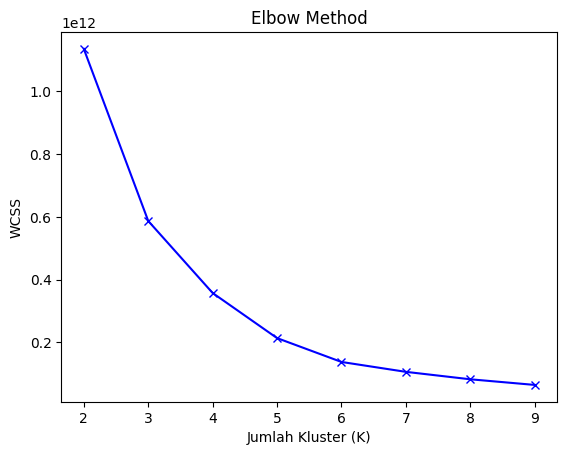

In [ ]:
import warnings
warnings.filterwarnings("ignore")
elbow_scores = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train)
    elbow_scores.append(kmeans.inertia_)

plt.plot(k_range, elbow_scores,"bx-")
plt.xlabel('Jumlah Kluster (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

Setelah melakukan analisis dengan menggunakan metode elbow pada grafik hasil plot SSE vs k, ditemukan bahwa nilai k yang optimal untuk analisis data pelanggan toko 3. Hal ini dikarenakan pada grafik terlihat bahwa setelah angka 3, tidak terdapat penurunan yang signifikan pada distorsi yang semakin mengecil. Oleh karena itu, nilai k yang optimal untuk analisis ini adalah 3.

#####Calculating KMeans
Dalam pengembangan algoritma K-means untuk analisis data customer toko, akan dibuat sebuah class yang bernama Kmeans. Class tersebut akan berisi fungsi-fungsi untuk menentukan kluster mana sebuah baris data akan ditempatkan dan untuk menentukan pusat kluster secara acak.

In [ ]:
class Kmeans:
    """The k-means algorithm."""

    def __init__(self, n_clusters):
        self.data = pd.DataFrame()
        self.n_clusters = n_clusters
        self.centroids = pd.DataFrame()
        self.clusters = np.ndarray(1)
        self.old_centroids = pd.DataFrame()
        self.verbose = False
        self.predictions = list()

    def train(self, df, verbose):
        self.verbose = verbose
        self.data = df.copy(deep=True)
        self.clusters = np.zeros(len(self.data))

        if 'species' in self.data.columns:
            self.data.drop('species', axis=1, inplace=True)

        # Randomly initialize centroids
        unique_rows = self.data.drop_duplicates()
        unique_rows.reset_index(drop=True, inplace=True)
        self.centroids = unique_rows.sample(n=self.n_clusters)
        self.centroids.reset_index(drop=True, inplace=True)

        if self.verbose:
            print("\nRandomly initiated centroids:")
            print(self.centroids)

        # Initialize old centroids as a matrix of all 0's
        self.old_centroids = pd.DataFrame(np.zeros(shape=(self.n_clusters, self.data.shape[1])),
                                          columns=self.data.columns)

        # Compare every data point in our dataset to each of the k-means and assign each point to closest cluster
        while not self.old_centroids.equals(self.centroids):
            
            if self.verbose:
                time.sleep(3)

            # Stash old centroids
            self.old_centroids = self.centroids.copy(deep=True)

            # Iterate through each data point in the matrix
            for row_i in range(0, len(self.data)):
                distances = list()
                point = self.data.iloc[row_i]

                # Calculate the distance between the current point and each of the centroids
                for row_c in range(0, len(self.centroids)):
                    centroid = self.centroids.iloc[row_c]
                    distances.append(np.linalg.norm(point - centroid))

                # Assign this data point to a cluster
                self.clusters[row_i] = np.argmin(distances)

            # For each cluster extract the values which now belong to each cluster and calculate new k-means
            for cls in range(0, self.n_clusters):

                cls_idx = np.where(self.clusters == cls)[0]

                if len(cls_idx) == 0:
                    self.centroids.loc[cls] = self.old_centroids.loc[cls]
                else:
                    # Set the new k-mean to the mean value of the data points within this cluster
                    self.centroids.loc[cls] = self.data.iloc[cls_idx].mean()
                    
                if self.verbose:
                    print("\nRow indices belonging to cluster {}: [n={}]".format(cls, len(cls_idx)))
                    print(cls_idx)

            if self.verbose:
                print("\nOld centroids:")
                print(self.old_centroids)
                print("New centroids:")
                print(self.centroids)

In [ ]:
number_of_clusters = 3
kmeans = Kmeans(n_clusters=number_of_clusters)
kmeans.train(df=train, verbose=False)

Untuk menjalankan class Kmeans, perlu dilakukan inisiasi objek terlebih dahulu dengan menentukan jumlah kluster yang diinginkan (nilai kluster sudah ditentukan sebelumnya saat penggunaan elbow method). Setelah itu, dilakukan training pada data train untuk melatih model algoritma K-Means.

In [ ]:
# Extract the results
train['cluster'] = kmeans.clusters
centroids = kmeans.centroids
centroids['cluster'] = 'centroid'
all_df = pd.concat([train, centroids])

Bagian ini akan digunakan untuk mengekstrak hasil kluster yang telah dilakukan sebelumnya, lalu menyimpannya dalam sebuah variabel baru bernama **all_df**

In [ ]:
all_df.columns

Index(['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience',
       'Family Size', 'Gender_Female', 'Gender_Male', 'Profession_Artist',
       'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'cluster'],
      dtype='object')

In [ ]:
# Membuat DataFrame kosong untuk hasil decode
X_train_decoded = pd.DataFrame()

# Kolom-kolom yang akan digabungkan
gender_cols = ['Gender_Female', 'Gender_Male']
profession_cols = ['Profession_Artist',
       'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing']

# Menambahkan kolom-kolom numerik
X_train_decoded['Age'] = all_df['Age'].astype(int)
X_train_decoded['Annual Income ($)'] = all_df['Annual Income ($)'].astype(int)
X_train_decoded['Spending Score (1-100)'] = all_df['Spending Score (1-100)'].astype(int)
X_train_decoded['Work Experience'] = all_df['Work Experience']
X_train_decoded['Family Size'] = all_df['Family Size']
X_train_decoded['cluster'] = all_df['cluster']

# Menggabungkan kolom-kolom yang sama dan menjadikan sebagai satu kolom
X_train_decoded['gender'] = all_df[gender_cols].idxmax(axis=1).str.split('_', expand=True)[1]
X_train_decoded['profession'] = all_df[profession_cols].idxmax(axis=1).str.split('_', expand=True)[1]
X_train_decoded

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,cluster,gender,profession
1,22,15000,39,1.000000,4.000000,0.0,Male,Healthcare
2,22,35000,81,3.000000,3.000000,0.0,Male,Engineer
3,22,86000,6,1.000000,1.000000,1.0,Female,Engineer
4,23,59000,77,0.000000,2.000000,0.0,Female,Lawyer
5,31,38000,40,2.000000,6.000000,0.0,Female,Entertainment
...,...,...,...,...,...,...,...,...
1999,77,182109,4,7.000000,2.000000,2.0,Male,Executive
2000,80,110610,52,5.000000,2.000000,1.0,Male,Entertainment
0,47,56329,49,3.657046,3.528014,centroid,Female,Artist
1,51,106338,51,4.224784,3.756484,centroid,Female,Artist


####2D Plotting
Akan dilakukan plotting secara 2 dimensi untuk tiap variabel tertentu agar dapat menjelasakan ciri-ciri dari setiap kluster yang sudah dihitung

In [ ]:
def plot_cluster(cluster_df):
    plot, ax = plt.subplots(3,5,figsize=(55,15),constrained_layout=True)
    cols = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience','Family Size']
    for i,col in enumerate(cols):
        sns.histplot(data=cluster_df, x=col, ax=ax[0][i], kde=True)
        sns.boxplot(data=cluster_df, x=col, ax=ax[1][i])
    sns.countplot(data=cluster_df, x="profession", ax=ax[2][0])
    sns.countplot(data=cluster_df, x="gender", ax=ax[2][1])
    # sns.countplot(data=cluster_df, x="shopping_mall", ax=ax[2][3])

Fungsi di atas merupakan fungsi untuk menampilkan kluster

In [ ]:
cluster1 = X_train_decoded[X_train_decoded['cluster'] == 0]
cluster2 = X_train_decoded[X_train_decoded['cluster'] == 1]
cluster3 = X_train_decoded[X_train_decoded['cluster'] == 2]

Baris tersebut merupakan baris untuk menampung setiap baris data ke dalam kluster yang sesuai, dan baris hasil kluster tersebut akan disimpan dalam sebuah variabel.

In [ ]:
cluster1.describe()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,589.000000,589.000000,589.000000,589.000000,589.000000
mean,47.558574,56329.324278,49.483871,3.657046,3.528014
std,21.405513,20243.956757,27.892868,3.736364,1.929360
min,22.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,50429.000000,26.000000,1.000000,2.000000
50%,44.000000,62000.000000,50.000000,2.000000,3.000000
75%,68.000000,70844.000000,73.000000,7.000000,5.000000
max,80.000000,81199.000000,100.000000,17.000000,9.000000


tabel di atas merupakan statistika deskriptif pada cluster 1

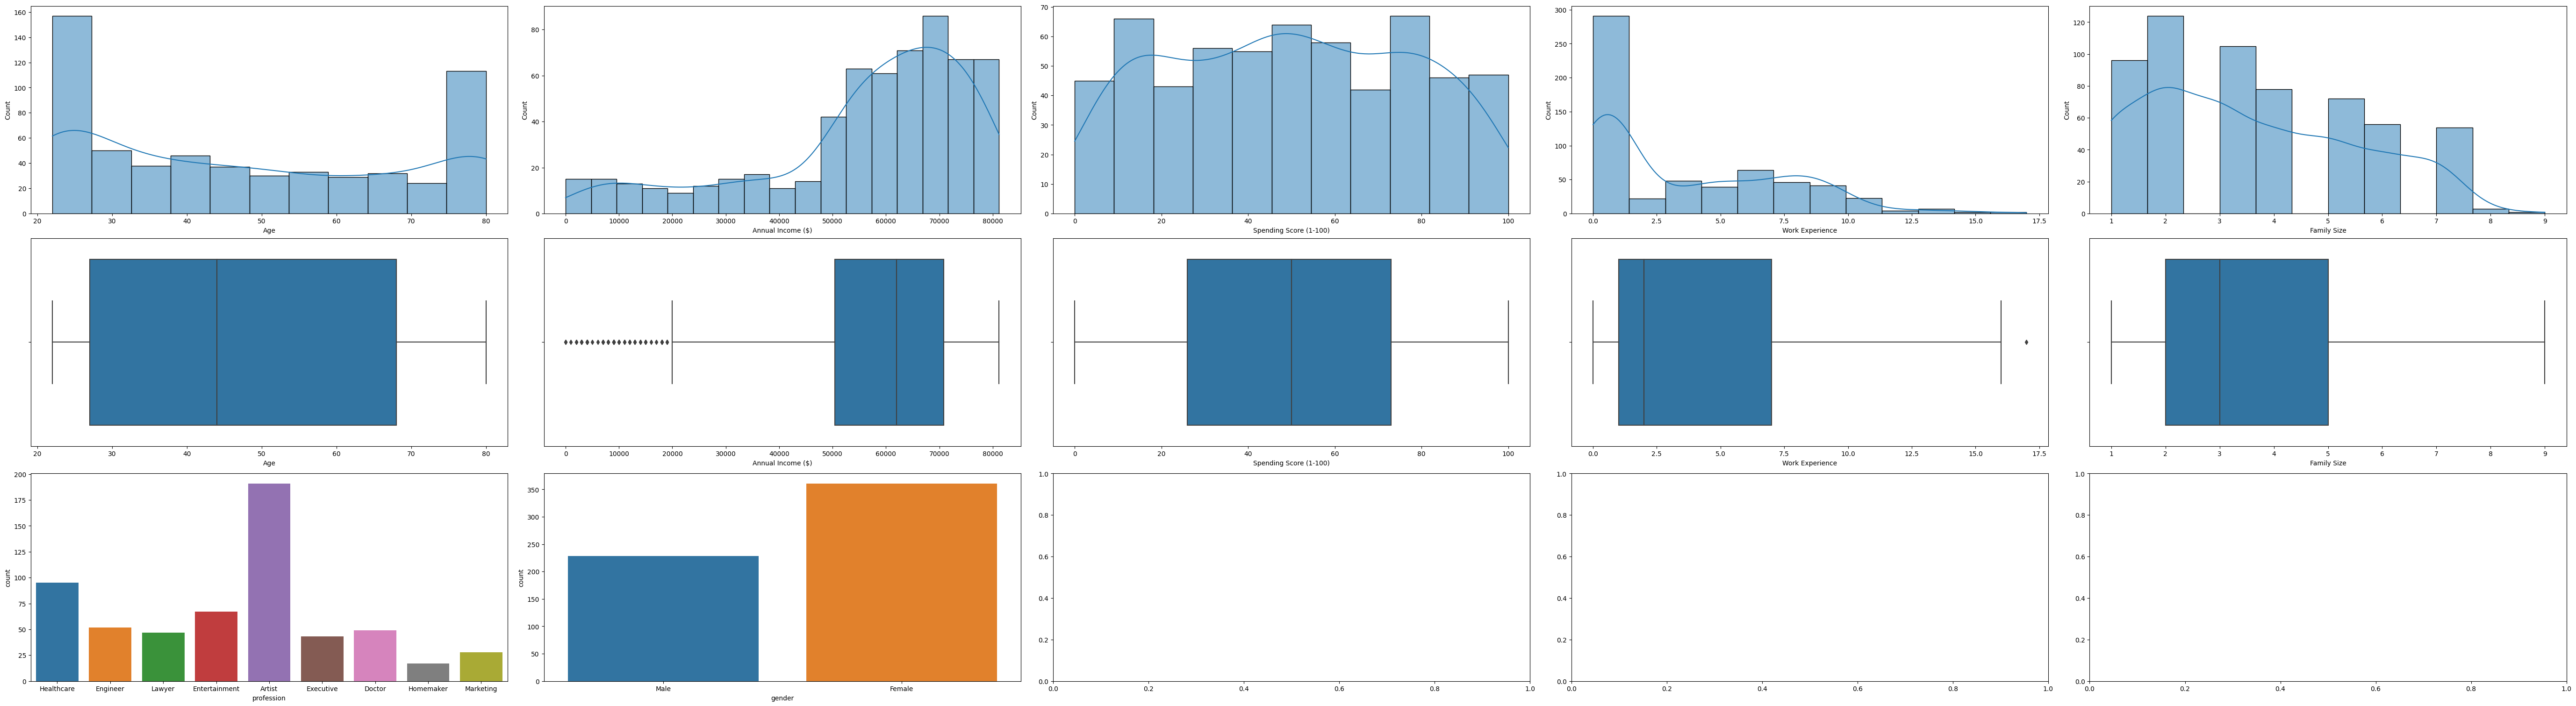

In [ ]:
plot_cluster(cluster1)

Ciri - ciri cluster 1 :
- Cluster 1 ini di dominasi oleh perempuan dan terdapat beberapa laki-laki


In [ ]:
cluster2.describe()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,694.000000,694.000000,694.000000,694.000000,694.000000
mean,51.138329,106338.335735,51.367435,4.224784,3.756484
std,22.815362,15553.622035,28.405975,3.968297,1.951743
min,22.000000,81545.000000,1.000000,0.000000,1.000000
25%,25.000000,92357.750000,28.000000,1.000000,2.000000
50%,52.000000,104963.500000,50.000000,4.000000,4.000000
75%,77.000000,119286.750000,76.000000,8.000000,5.000000
max,80.000000,134008.000000,100.000000,17.000000,7.000000


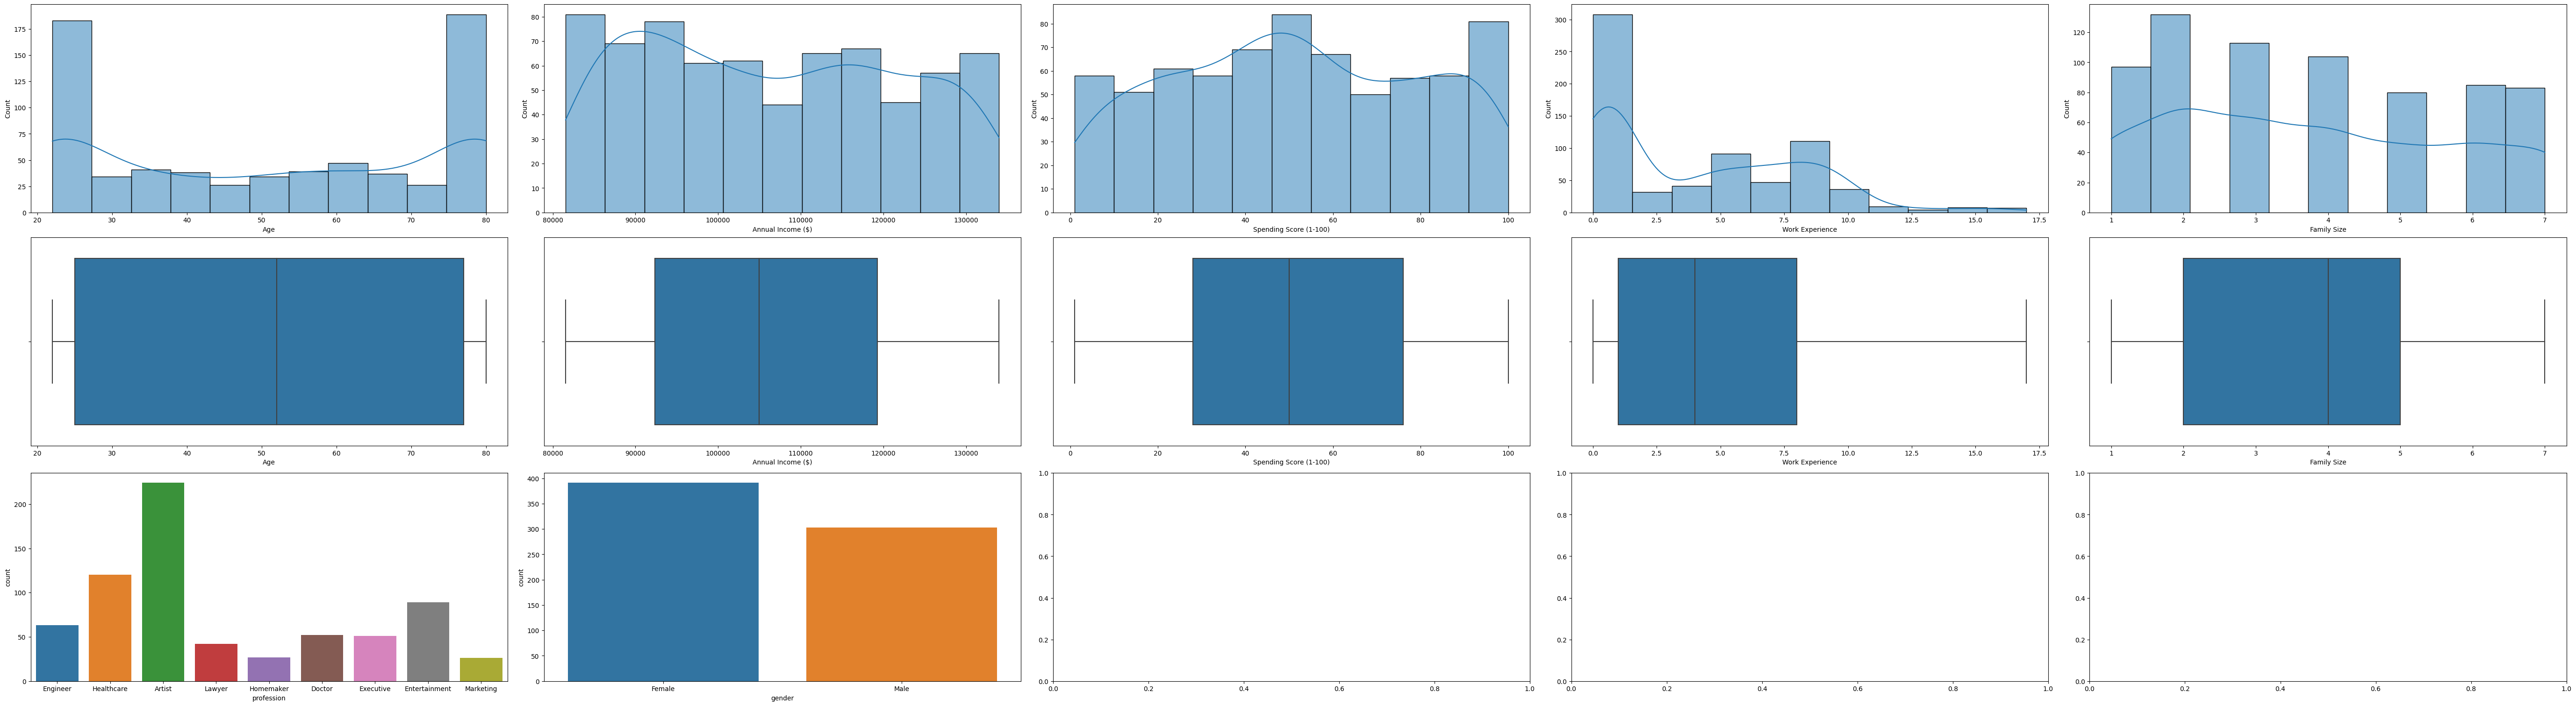

In [ ]:
plot_cluster(cluster2)

In [ ]:
cluster3.describe()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,682.000000,682.000000,682.000000,682.000000,682.000000
mean,49.382698,161852.906158,52.162757,4.334311,3.956012
std,23.032541,16182.274130,27.586653,4.017907,1.999515
min,22.000000,134213.000000,1.000000,0.000000,1.000000
25%,22.000000,147838.250000,31.000000,1.000000,2.000000
50%,48.000000,162309.500000,51.000000,4.000000,4.000000
75%,75.000000,175263.750000,77.000000,8.000000,6.000000
max,80.000000,189974.000000,100.000000,17.000000,8.000000


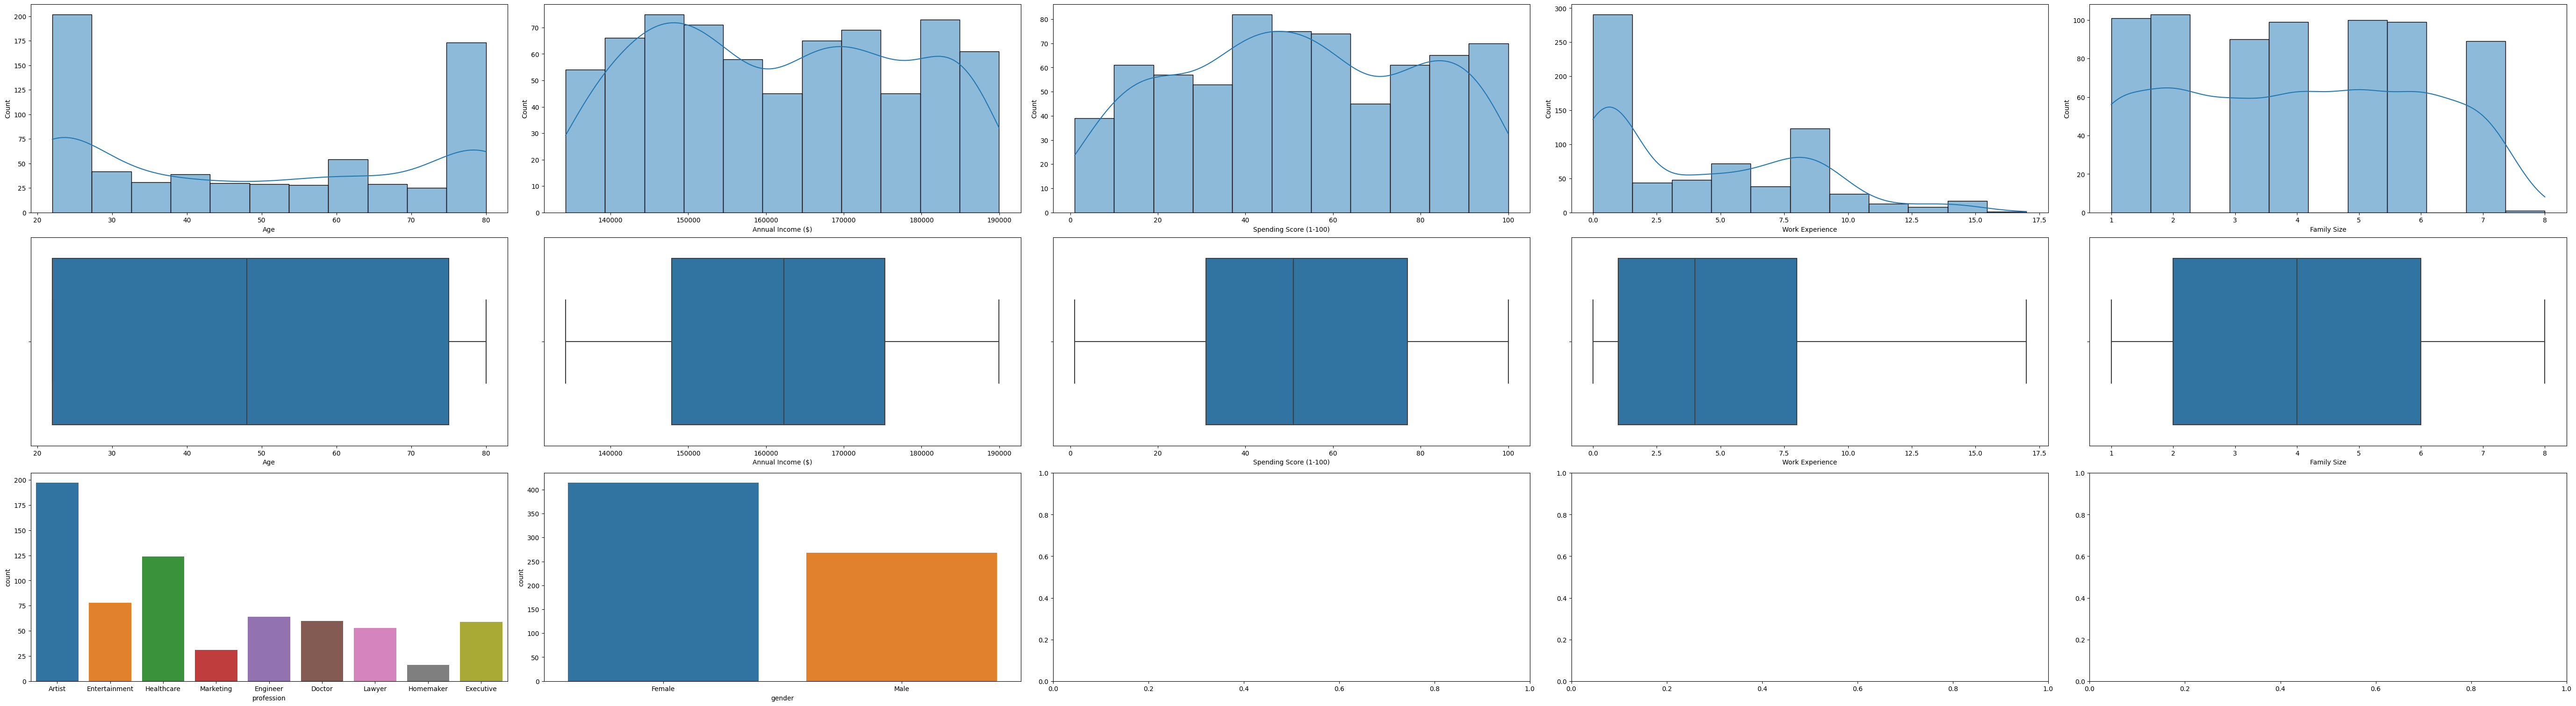

In [ ]:
plot_cluster(cluster3)

####3D Plotting

In [ ]:
px.scatter_3d(X_train_decoded, x='Annual Income ($)', y='Spending Score (1-100)', z='Age', color='cluster',color_continuous_scale=['#ADFF2F', '#19A3E8', '#FF5A44', '#FFD326'])

Di atas merupakan hasil persebaran data yang telah diclustering

# **Evaluation**

### Metric Pengukuran


Untuk mengukur seperapa efektif algoritma-algoritma diatas mengclusterkan dataset yang ada, dilakukanlah beberapa pengukuran.

Metric yang digunakan pada pengukuran ini adalah Silhouette Score, Calinski-Harabasz Score, dan Davies-Bouldin Score. Silhouette score mengukur seberapa dekat setiap titik pada kluster tertentu dibandingkan dengan kluster lainnya. Semakin tinggi nilai silhouette score, semakin baik klaster tersebut. Calinski-Harabasz score mengukur rasio antara variansi yang dijelaskan oleh kluster dan variansi di antara kluster. Semakin tinggi nilai calinski-harabasz score, semakin baik algoritma clustering tersebut. Sedangkan Davies-Bouldin score mengukur jarak antara kluster dan meminimalkan jarak antar kluster, semakin rendah nilai Davies-Bouldin score, semakin baik algoritma clustering tersebut.

Kriteria untuk menilai algoritma clustering semakin baik atau tidak pada setiap matriks evaluasi adalah:

* Silhouette score: semakin dekat nilai silhouette score ke 1, semakin baik kualitas clustering. Nilai silhouette score yang dekat ke -1 menunjukkan cluster yang buruk.
* Calinski-Harabasz score: semakin tinggi nilai calinski-harabasz score, semakin baik kualitas clustering. Nilai yang rendah menunjukkan cluster yang tidak terpisah dengan baik.
* Davies-Bouldin score: semakin rendah nilai davies-bouldin score, semakin baik kualitas clustering. Nilai yang tinggi menunjukkan cluster yang saling tumpang tindih.

In [ ]:
# Menghitung nilai Silhouette Score
silhouette_avg = silhouette_score(train.drop('cluster', axis=1), kmeans.clusters)

# Menghitung nilai Calinski-Harabasz Index
ch_score= calinski_harabasz_score(train.drop('cluster', axis=1), kmeans.clusters)

# Menghitung nilai Davies-Bouldin Index
db_score= davies_bouldin_score(train.drop('cluster', axis=1), kmeans.clusters)

# Create dataframe for metrics and scores
metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores = [silhouette_avg, ch_score, db_score]
df_scores = pd.DataFrame({'Metric': metrics, 'Score': scores})

# reset index dataframe
df_scores = df_scores.reset_index(drop=True)

# ubah nama axis pada index dan kolom
df_scores = df_scores.rename_axis('', axis=0).rename_axis('Metrics', axis=1)

# Display dataframe as table without index column
display(df_scores.style.hide_index())


Metric,Score
Silhouette Score,0.557535
Calinski-Harabasz Score,5914.726545
Davies-Bouldin Score,0.556430


# **Deployment**
Membuat kesimpulan analisis dan menyimpan data hasil klustering ke dalam sebuah file dengan format csv untuk digunakan dalam Looker Studio (Google Data Studio)

In [ ]:
X_train_decoded.to_csv('Shop Customer Data.csv')